# Features selection

In [19]:
# Author: Arnova Abdullah
# Date: 26-05-2022
# Description: Code to select most independent features using Heatmap of Correlation matrix

* This notebook contains code for selection of important features from the dataset.
* The important features are selected and filtered from the dataset and stored in a new file.
* The definitions of the selected features are provided below for reference.

## Importing modules

In [46]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import f_classif, mutual_info_classif

## Loading data from CSV file

In [47]:
df = pd.read_csv('data/genre_data_clean.csv')
df.head()
df.shape

(12000, 20)

## Removing unnecessary features

There are 21 columns in the dataset. Below is a list of all the columns.

In [48]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'year', 'genre'],
      dtype='object')

It can be identified that the following columns have no significance in training a machine learning mode:

1. `type`
2. `id`
3. `uri`
4. `track_href`
5. `analysis_url`
6. `year`
7. `duration_ms`


Therefore, these columns are dropped from the dataset.

In [49]:
df.drop(
    ['type', 'id', 'uri', 'track_href', 'analysis_url', 'year', 'duration_ms'], 
    axis=1, 
    inplace=True
) 
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,acoustic


In [50]:
X = df.drop(['mode','key','genre','time_signature'], axis=1)
y = df['genre']

In [53]:
f, p = f_classif(X,y)
mis = mutual_info_classif(X, y) * 100

In [52]:
pd.DataFrame([f, mis], index=['ANOVA score', 'MIS score (%)'], columns=X.keys())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
ANOVA score,780.731684,1288.404258,2194.962965,103.507418,1423.702296,1407.783693,34.839072,322.723637,85.487382
MIS score (%),26.769150,38.399252,38.430856,12.242203,44.402401,32.802659,6.220225,15.741268,21.226282


## Correlation Matrix

In [12]:
# Converting categorical feature 'genre' to numerical to see the correlation among the features
df['genre']=df['genre'].astype('category').cat.codes
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
danceability,1.000000,0.277669,0.029373,0.389346,-0.073449,0.105969,-0.335765,-0.200610,-0.065072,0.494665,-0.059718,0.201062,0.237170
energy,0.277669,1.000000,0.032465,0.830976,-0.072364,0.194268,-0.829019,-0.431429,0.193508,0.447930,0.279120,0.222907,0.372829
key,0.029373,0.032465,1.000000,0.021856,-0.117095,0.019516,-0.024683,0.009868,0.002486,0.027677,-0.000828,0.005573,0.003398
loudness,0.389346,0.830976,0.021856,1.000000,-0.017899,0.125826,-0.733540,-0.626945,0.142140,0.431540,0.248310,0.208010,0.272463
mode,-0.073449,-0.072364,-0.117095,-0.017899,1.000000,-0.100551,0.074109,-0.091410,-0.016801,-0.007563,0.008881,-0.012357,-0.137319
speechiness,0.105969,0.194268,0.019516,0.125826,-0.100551,1.000000,-0.145956,-0.086806,0.120006,0.057074,0.118739,0.027636,0.133422
acousticness,-0.335765,-0.829019,-0.024683,-0.733540,0.074109,-0.145956,1.000000,0.395593,-0.125906,-0.345431,-0.247636,-0.211186,-0.410887
instrumentalness,-0.200610,-0.431429,0.009868,-0.626945,-0.091410,-0.086806,0.395593,1.000000,-0.115850,-0.346888,-0.129696,-0.126346,0.033943
liveness,-0.065072,0.193508,0.002486,0.142140,-0.016801,0.120006,-0.125906,-0.115850,1.000000,0.060969,0.058020,0.031553,0.053619
valence,0.494665,0.447930,0.027677,0.431540,-0.007563,0.057074,-0.345431,-0.346888,0.060969,1.000000,0.100806,0.184904,0.065382


In [5]:
df['genre']

0        0
1        0
2        0
3        0
4        0
        ..
11995    9
11996    9
11997    9
11998    9
11999    9
Name: genre, Length: 12000, dtype: int8

<AxesSubplot:>

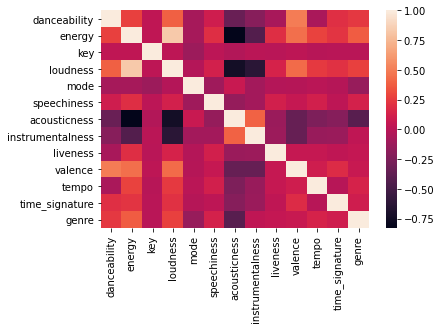

In [25]:
sns.heatmap(df.corr(method = 'pearson'))

* From the correlation matrix, we can see that the feature 'key' has less correlation with the target column 'genre'. So we will remove 'key' 

In [26]:
df.drop(
    ['key'], 
    axis=1, 
    inplace=True
) 
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,0
1,0.496,0.3780,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,0
2,0.760,0.7650,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,0
3,0.607,0.1960,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,0
4,0.497,0.0919,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,0


<AxesSubplot:>

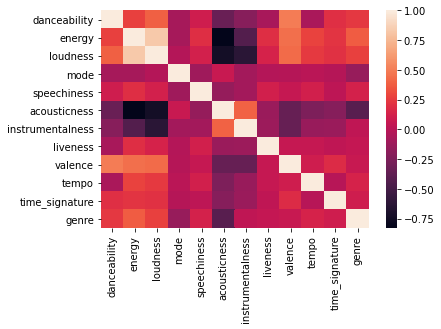

In [27]:
sns.heatmap(df.corr(method = 'pearson'))

* After removing 'key' & 'instrumentalness', now we can see that 'energy', 'loudness' & 'acousticness' has strong correlation with each other. 

In [29]:
df[['loudness', 'energy', 'acousticness', 'instrumentalness','genre']].corr()

,loudness,energy,acousticness,instrumentalness,genre
loudness,1.000000,0.830976,-0.733540,-0.626945,0.272463
energy,0.830976,1.000000,-0.829019,-0.431429,0.372829
acousticness,-0.733540,-0.829019,1.000000,0.395593,-0.410887
instrumentalness,-0.626945,-0.431429,0.395593,1.000000,0.033943
genre,0.272463,0.372829,-0.410887,0.033943,1.000000


<AxesSubplot:>

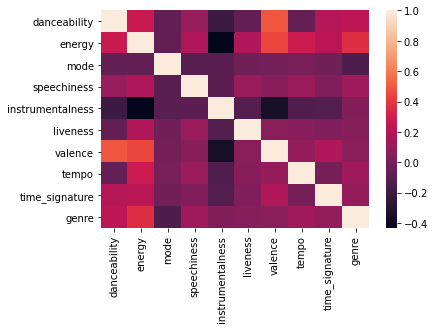

In [30]:
df.drop(['loudness', 'acousticness'], axis=1, inplace=True)
sns.heatmap(df.corr())

We have finally arrived at the feature set with least possible correlation. 

## Scatter Matrix

We plot the scatter matrix finally to cross verify and make sure that there are no correlation patterns.

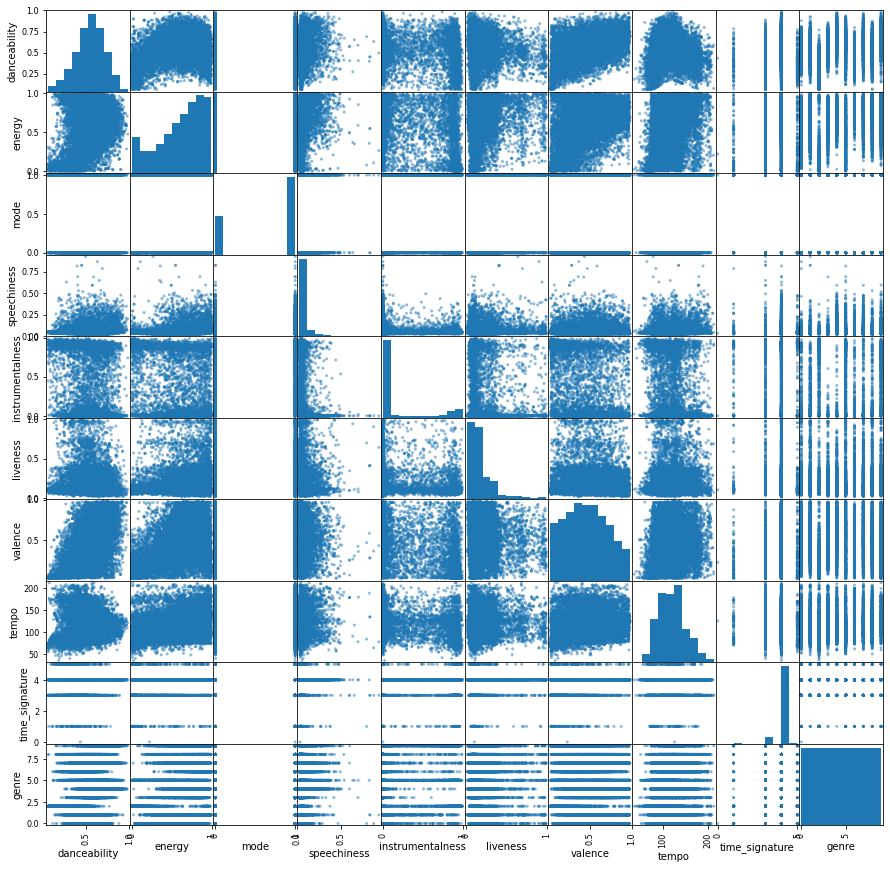

In [31]:
scatter_matrix(df, figsize=(15,15));

As we see, there no visible linear correlation amongst the remaining features. Thus we have arrived the most independent set of features and we shall use this for our further tasks.

## Writing filtered dataset to file

In [32]:
df.to_csv('data/genre_data_final.csv', index=False)

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('data/genre_data_final.csv')

In [35]:
X = df.drop('genre',axis=1)
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=43, 
    stratify=df['genre']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 9), (2400, 9), (9600,), (2400,))

In [36]:


X_train.to_csv('data/X_train.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)